### Assignment 3: EDA and Prediction with Logistic Regression 

### You must push a version before next Thursday at class time! 

### The Heart Disease Prediction dataset provides vital insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals classified as either having or not having heart disease based on results from cardiac catheterizations - the gold standard in heart health assessment. Each patient is identified by 13 independent predictive variables revealing their age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of vessels seen on fluoroscopy showing narrowing of their coronary arteries

In [2]:
import pandas as pd  
heart = pd.read_csv('Heart.csv')

### 1. Use pandas method to summarize the properties of the data. Use `head` and `info` and `.value_counts` and `describe` pandas methods to explore the data. 
### Identify which variables are categorical, and which variables are numeric.For categorical data, use `.value_counts` to identify any variables that are highly imbalanced.  
### Are there any missing data? 
### What is the primary target variable (i.e., variable to predict).  Are there any interesting secondary variables to predict? 
### After your exploration, write a few sentences in a markdown box to comment on these questions.  

In [3]:
display(heart.head())

display(heart.info())


display(heart.describe())


display(heart['Sex'].value_counts())

display(heart['Thal'].value_counts())

display(heart['AHD'].value_counts())


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


None

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


1    206
0     97
Name: Sex, dtype: int64

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

No     164
Yes    139
Name: AHD, dtype: int64

### 2.  Use Seaborn to explore the numeric data graphically. Two goals here. First, are there any variables that are highly correlated with each other.  Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease. Write your hypothesis in the markdown box provided.  

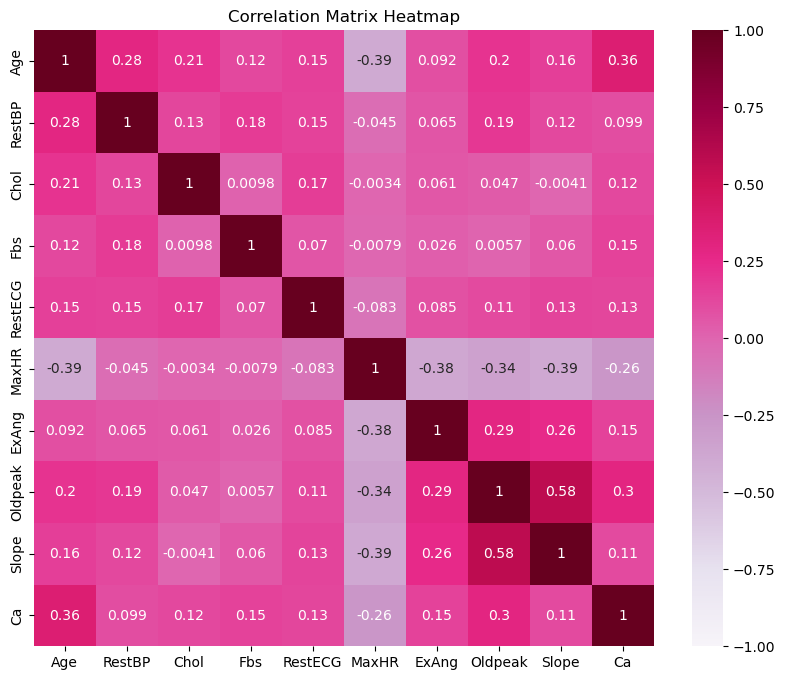

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


heart_cleaned = heart.dropna()

numerical_columns = ['Age', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng','Oldpeak', 'Slope', 'Ca']
correlation_matrix = heart[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="PuRd", vmin = -1, vmax = 1)
plt.title("Correlation Matrix Heatmap")
plt.show()

I wouldn't say they are necessarily "strongly" correlated specifically, however the following variables do have the strongest correlations out of all the numerical data at an r of 0.58:

Old Peak & Slope

I would hypothesize that none of these numeric variables are good predictors of heart disease.



### 3. As the analysis plan is to use a Logistic Regression model, all variables will need to be converted to numeric representations. One way to do this is `pd.get_dummies` which I give an example below. The other way to do it is to use .map method and define an encoder. 

### I show both approaches below.  Typically, if there is an obvious hierarchical relationship, I might use my own encoder to express that.  If there isnt, get_dummies is more sensible then a hierarchical approach

### After you encode the heart data, feel free to delete my example code.  

In [9]:
categorical_columns = ['ChestPain', 'Thal']
heart_encoded = pd.get_dummies(heart_cleaned, columns=categorical_columns)


display(heart_encoded)

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0,No,0,0,0,1,1,0,0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes,1,0,0,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes,1,0,0,0,0,0,1
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0,No,0,1,0,0,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0,No,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,140,241,0,0,123,1,0.2,2,0.0,Yes,1,0,0,0,0,0,1
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0,Yes,0,0,0,1,0,0,1
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0,Yes,1,0,0,0,0,0,1
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0,Yes,1,0,0,0,0,0,1


### 4. We are going to have to decide how we want to cross-validate the models we build. First split the data into training and test data (using `train_test_split`). I recommend 25% test set data.   Then using the training data only, make use of K-fold cross validation to create multiple training and test sets. I recommend doing 5-folds.    

In [33]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


y = heart_encoded['AHD']

X = heart_encoded.drop(columns=['AHD'])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


model = LogisticRegression(max_iter=1000, solver='liblinear')


kf = KFold(n_splits=5, shuffle=True, random_state=42)

kf_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

   
    model.fit(X_train_fold, y_train_fold)

   
    y_val_pred = model.predict(X_val_fold)

    
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold + 1} Validation Accuracy: {accuracy}")

    kf_accuracies.append(accuracy)


average_accuracy = sum(kf_accuracies) / len(kf_accuracies)
print(f"\nAverage Cross-Validation Accuracy: {average_accuracy}")


Fold 1 Validation Accuracy: 0.8666666666666667
Fold 2 Validation Accuracy: 0.7777777777777778
Fold 3 Validation Accuracy: 0.8863636363636364
Fold 4 Validation Accuracy: 0.7954545454545454
Fold 5 Validation Accuracy: 0.7954545454545454

Average Cross-Validation Accuracy: 0.8243434343434343


### 5. Fit a logistic regression model on the training data using K-fold cross-validation to first assess model fit. Your assessment should include accuracy, confusion matrix, and ROC curve.     


Test Accuracy: 0.8242424242424242


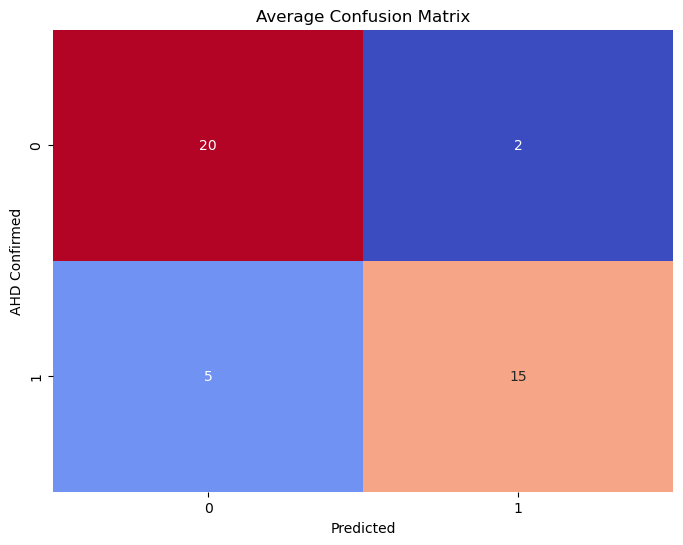

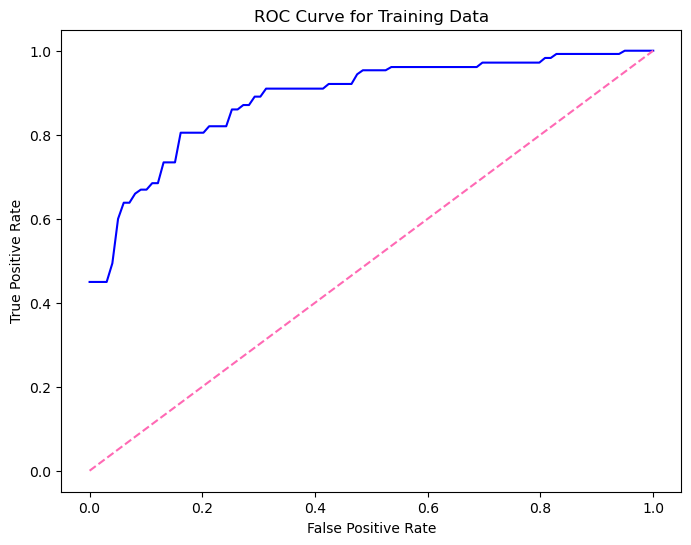

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_accuracies = []
kf_confusion_matrices = []
kf_tprs = []
mean_fpr = np.linspace(0, 1, 100)

for fold, (train_index, val_index) in enumerate(kf.split(X_train_scaled)):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

   
    model.fit(X_train_fold, y_train_fold)

    
    y_val_pred = model.predict(X_val_fold)

    # Accuracy
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    kf_accuracies.append(accuracy)

    # The confusion matrix
    confusion = confusion_matrix(y_val_fold, y_val_pred)
    kf_confusion_matrices.append(confusion)

    # For the ROC curve
    fpr, tpr, _ = roc_curve((y_val_fold == 'Yes').astype(int), model.predict_proba(X_val_fold)[:, 1])

    kf_tprs.append(np.interp(mean_fpr, fpr, tpr))


average_accuracy = sum(kf_accuracies) / len(kf_accuracies)
print(f"\nTest Accuracy: {average_accuracy}")


average_confusion_matrix = sum(kf_confusion_matrices) // len(kf_confusion_matrices)
plt.figure(figsize=(8, 6))
sns.heatmap(average_confusion_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Average Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('AHD Confirmed')
plt.show()


mean_tpr = np.mean(kf_tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='hotpink', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.show()


### 6. Fit a logistic regression model using all the training data and test it on the test data.  Provide accuracy, confusion matrix, and ROC curve.


Test Accuracy: 0.9066666666666666


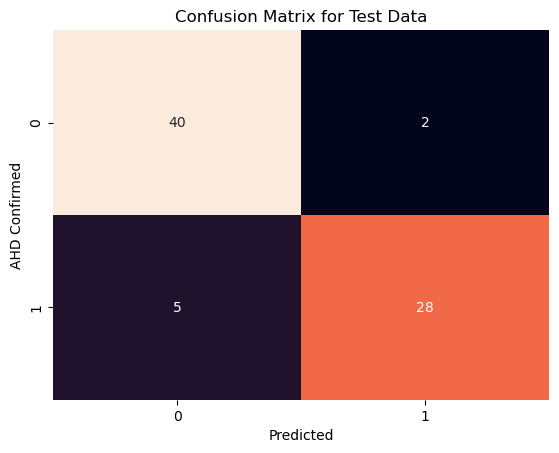

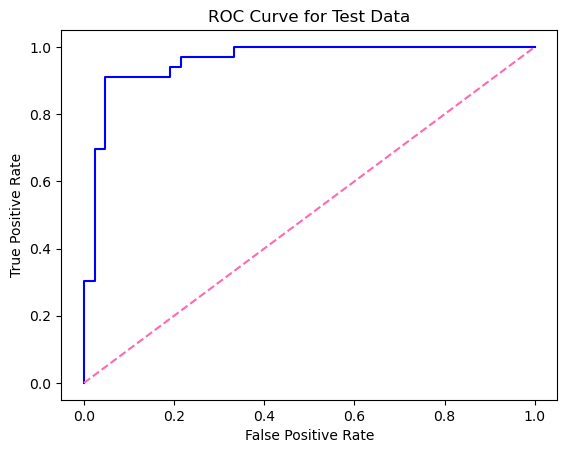

In [70]:

y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy}")

confusion_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_test, annot=True, fmt="d", cbar=False)
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('AHD Confirmed')
plt.show()


fpr_test, tpr_test, _ = roc_curve(y_test.replace({'No': 0, 'Yes': 1}), model.predict_proba(X_test_scaled)[:, 1])


plt.plot(fpr_test, tpr_test, color='b', label=f'Test ROC (AUC = {auc(fpr_test, tpr_test):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='hotpink', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Data')
plt.show()


### 7.Examine your model to determine if you can understand what features and criterion it is using to classify the data. Write your descriptive answer in the markdown box.   

In particular, looking at the results I got from fitting the logistic regression model from the test data and then using it on the training data, this method appears to have a higher accuracy at predicting heart disease than the other model in regards to the training data. 

I do find this interesting though because earlier, there did not seem to be any strong predictive factors of heart disease given the correlation matrix created. I think the reason this model is able to predict heart disease with better accuracy is because it is heavily relying on the training data to make its prediction.